In [2]:
%matplotlib inline
import numpy as np
import quantfin as qf
import matplotlib.pyplot as plt

In [3]:
# Generate random price data
t = np.arange(0, 250) # Time
A = qf.random_walk.geometric_brownian(250, 0.01, 0.0, 0.4) # Closing prices

# Calculate returns
R = qf.utils.returns_from_prices(A) # Returns
t = t[1:]

In [4]:
# Calculate using 20-day moving average
M = 20
sigma = qf.volatility.average.moving(R, M)

# Calculate using exponentially weighted moving average
smoothing = 0.98
sigma2 = qf.volatility.average.weighted(R, smoothing)

# Calculate using GARCH model
params_sym = qf.volatility.garch_sym.fit_model(R)
sigma3 = qf.volatility.garch_sym.sigma(R, params_sym)

# Calculate using aymmetric GARCH model (this takes a while)
params_asym = qf.volatility.garch_asym.fit_model(R)
sigma4 = qf.volatility.garch_asym.sigma(R, params_asym)

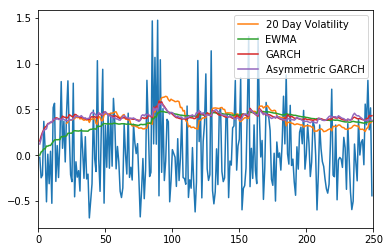

In [8]:
# Plot results
plt.plot(t, R);
moving_plot, = plt.plot(t[M:], sigma);
ewma_plot, = plt.plot(t, sigma2);
garch_plot, = plt.plot(t, sigma3);
garch_a_plot, = plt.plot(t, sigma4)
plt.xlim((0, 250));
plt.legend([moving_plot, ewma_plot, garch_plot, garch_a_plot],
           ["20 Day Volatility",
            "EWMA",
            "GARCH",
            "Asymmetric GARCH"]);

In [9]:
qf.volatility.garch_sym.expected(params_sym)

0.42510038186269816